# Exploratory Data Analysis with NLP Tools

In [ ]:
#!pip install pandas-profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas_profiling
import warnings
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string
import datetime as dt
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('bmh')

In [2]:
nltk.download()
string.punctuation

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
# Set path to cryptocurrency csv files
path = '../Data/Reddit_Comments/Bitcoin/'

files = os.listdir(path)

# Create list of csv file names
csv_list = []
for f in files:
    csv_list.append(f)

In [4]:
csv_list = csv_list[:-1]
csv_list

['Bitcoin_2018-12-31.csv',
 'Bitcoin_2019-01-01.csv',
 'Bitcoin_2019-01-02.csv',
 'Bitcoin_2019-01-03.csv',
 'Bitcoin_2019-01-04.csv',
 'Bitcoin_2019-01-05.csv',
 'Bitcoin_2019-01-06.csv',
 'Bitcoin_2019-01-07.csv',
 'Bitcoin_2019-01-08.csv',
 'Bitcoin_2019-01-09.csv',
 'Bitcoin_2019-01-10.csv',
 'Bitcoin_2019-01-11.csv',
 'Bitcoin_2019-01-12.csv',
 'Bitcoin_2019-01-13.csv',
 'Bitcoin_2019-01-14.csv',
 'Bitcoin_2019-01-15.csv',
 'Bitcoin_2019-01-16.csv',
 'Bitcoin_2019-01-17.csv',
 'Bitcoin_2019-01-18.csv',
 'Bitcoin_2019-01-19.csv',
 'Bitcoin_2019-01-20.csv',
 'Bitcoin_2019-01-21.csv',
 'Bitcoin_2019-01-22.csv',
 'Bitcoin_2019-01-23.csv',
 'Bitcoin_2019-01-24.csv',
 'Bitcoin_2019-01-25.csv',
 'Bitcoin_2019-01-26.csv',
 'Bitcoin_2019-01-27.csv',
 'Bitcoin_2019-01-28.csv',
 'Bitcoin_2019-01-29.csv',
 'Bitcoin_2019-01-30.csv',
 'Bitcoin_2019-01-31.csv',
 'Bitcoin_2019-02-01.csv',
 'Bitcoin_2019-02-02.csv',
 'Bitcoin_2019-02-03.csv',
 'Bitcoin_2019-02-04.csv',
 'Bitcoin_2019-02-05.csv',
 

In [5]:
csv_list[0]

'Bitcoin_2018-12-31.csv'

## Read csv file

In [ ]:
df = pd.read_csv(path + csv_list[0])
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

## Data Cleaning

In [ ]:
# Identify number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

In [ ]:
# Remove all rows that have NaN in df['body']
df = df[df['body'].notna()]

In [ ]:
df = df[df.author != "AutoModerator"]

In [ ]:
df.head()

In [ ]:
bitcoin_df = df[df['body'].str.contains('Bitcoin|BTC', case=False)]
bitcoin_df.head()

## Pandas Profiling Report

In [ ]:
# Pandas profile report for profile analysis of top datset
profile = pandas_profiling.ProfileReport(df)
profile

In [ ]:
# Pandas profile report for profile analysis of top datset
profile = pandas_profiling.ProfileReport(bitcoin_df)
profile

## Analyzing Text Statistics

In [ ]:
# Word Number Histogram
def word_number_hist(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

In [ ]:
word_number_hist(df['body'])

In [ ]:
word_number_hist(bitcoin_df['body'])

In [ ]:
# Average word length histogram for each sentence
def word_length_hist(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

In [ ]:
word_length_hist(df['body'])

In [ ]:
word_length_hist(bitcoin_df['body'])

## NLTK

In [ ]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

In [ ]:
# Plot Top Stopwords Barchart
def top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

In [ ]:
top_stopwords_barchart(df['body'])

In [ ]:
top_stopwords_barchart(bitcoin_df['body'])

In [ ]:
# Top Non-Stopwords Barchart
def top_words_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

In [ ]:
top_words_barchart(df['body'])

In [ ]:
top_words_barchart(bitcoin_df['body'])

## Ngram Exploration

In [ ]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
from nltk.util import ngrams

def top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

In [ ]:
top_ngrams_barchart(df['body'],2)

In [ ]:
top_ngrams_barchart(bitcoin_df['body'],2)

In [ ]:
top_ngrams_barchart(bitcoin_df['body'],3)

In [ ]:
top_ngrams_barchart(df['body'],3)

In [ ]:
top_ngrams_barchart(df['body'],4)

## Topic Modeling Exploration with pyLDAvis

In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models

nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

In [ ]:
df2 = df

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(df2['body'])

In [ ]:
lda_model.show_topics()

In [ ]:
lda_vis(lda_model, bow_corpus, dic)

In [ ]:
bitcoin_df2 = bitcoin_df
lda_model, bow_corpus, dic = get_lda_objects(bitcoin_df2['body'])

In [ ]:
lda_model.show_topics()

In [ ]:

lda_vis(lda_model, bow_corpus, dic)

## Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for x in df2.body:
     
    # typecaste each val to string
    x = str(x)
 
    # split the value
    tokens = x.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
# iterate through the csv file
for x in bitcoin_df.body:
     
    # typecaste each val to string
    x = str(x)
 
    # split the value
    tokens = x.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Polarity Histogram
def polarity(text):
    return TextBlob(text).sentiment.polarity

df2['polarity_score']=df2['body'].\
   apply(lambda x : polarity(x))
df2['polarity_score'].hist()

In [ ]:
# Plot Bitcoin Polarity Histogram
def polarity(text):
    return TextBlob(text).sentiment.polarity

bitcoin_df2['polarity_score']=bitcoin_df2['body'].\
   apply(lambda x : polarity(x))
bitcoin_df2['polarity_score'].hist()

Majority of comments are neutral

## Sentiment Barchart

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

In [ ]:
sentiment_barchart(df2['body'], method='Vader')

In [ ]:
# Plot bitcoin dataframe
sentiment_barchart(bitcoin_df2['body'], method='Vader')

## Sentiment Analysis with Vader

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
# function to calculate polarity scores
pol = lambda x: analyser.polarity_scores(x)

In [ ]:
clean_df = bitcoin_df2
clean_df.head()

In [ ]:
clean_df.shape

In [ ]:
# creating new column 'polarity' in clean_df
clean_df['polarity'] = clean_df['body'].apply(pol)

In [ ]:
# checking that worked
clean_df.head()

In [ ]:
# dropping unessential columns and seperating out 'polarity' dictionary
#df3 = pd.concat([clean_df.drop(['author_fullname'], axis=1), clean_df['polarity'].apply(pd.Series)], axis=1)
df3 = pd.concat([clean_df, clean_df['polarity'].apply(pd.Series)], axis=1)

In [ ]:
df3.head()

In [ ]:
# new dataframe with average polarity score for each label
scores_df = pd.DataFrame()
scores_df['avg_positive'] = str(df3['pos'].mean())
scores_df['avg_neutral'] = str(df3['neu'].mean())
scores_df['avg_negative'] = str(df3['neg'].mean())
scores_df['avg_compound'] = str(df3['compound'].mean())

In [ ]:
d = datetime.fromtimestamp(int(df3['created_utc'].iloc[0]))

In [ ]:
str(d).split(' 00:00:00', 1)[0]

In [ ]:
scores_df.head()

In [ ]:
# print average polarity score for each label
print('The average Positive score = ' + str(df3['pos'].mean()))
print('The average Neutral score = ' + str(df3['neu'].mean()))
print('The average Negative score = ' + str(df3['neg'].mean()))
print('The average Compound score = ' + str(df3['compound'].mean()))

In [ ]:
# counting unique values
u = len(pd.unique(df2['author']))
  
print("Number of unique values :", u)

In [ ]:
# Count unique calues in each column
print(df2['author'].value_counts())

## Name Entity Recognition

https://stackoverflow.com/questions/66367475/oserror-e050-cant-find-model-en-core-web-sm-it-doesnt-seem-to-be-a-short

In [ ]:
import spacy
from collections import  Counter
import seaborn as sns

In [ ]:
def named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

In [ ]:
named_entity_barchart(df2['body'])

## Frequency of Commonly Named Entities Barchart

In [ ]:
def most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x).set_title(entity)

In [ ]:
most_common_named_entity_barchart(df2['body'], entity="ORG")

In [ ]:
most_common_named_entity_barchart(df2['body'], entity="CARDINAL")

In [ ]:
most_common_named_entity_barchart(df2['body'], entity="PERSON")

In [ ]:
most_common_named_entity_barchart(df2['body'], entity="GPE")

## Create new dataframe with average sentiment polarity scores for each day

In [7]:
# Create dataframe to populate with polarity data
scores_df = pd.DataFrame(columns = ['time', 'avg_positive', 'avg_neutral', 'avg_negative', 'avg_compound'])

num = 0

for x in csv_list:

    # Read csv file to dataframe
    df = pd.read_csv(path + x)
    
    # Remove all rows that have NaN in df['body']
    df = df[df['body'].notna()]

    # Remove automoderator authors
    df = df[df.author != "AutoModerator"]

    #bitcoin_df = df[df['body'].str.contains('Bitcoin|BTC', case=False)]
    bitcoin_df = df

    analyser = SentimentIntensityAnalyzer()

    # function to calculate polarity scores
    pol = lambda x: analyser.polarity_scores(x)

    # creating new column 'polarity' in clean_df
    bitcoin_df['polarity'] = bitcoin_df['body'].apply(pol)

    # Seperating out 'polarity' dictionary
    bitcoin_df = pd.concat([bitcoin_df, bitcoin_df['polarity'].apply(pd.Series)], axis=1)

    # Create datetime object from timestamp
    d = dt.datetime.fromtimestamp(int(bitcoin_df['created_utc'].iloc[0]))

    # Append new polarity scores to new row of dataframe
    scores_df.loc[num] = [str(d).split(' ', 1)[0], str(bitcoin_df['pos'].mean()), str(bitcoin_df['neu'].mean()), str(bitcoin_df['neg'].mean()),
                        str(bitcoin_df['compound'].mean())]

    num = int(num) + 1

    # print average polarity score for each label
    #print('The Date = ' + str(d).split(' ', 1)[0])
    #print('The average Positive score = ' + str(bitcoin_df['pos'].mean()))
    #print('The average Neutral score = ' + str(bitcoin_df['neu'].mean()))
    #print('The average Negative score = ' + str(bitcoin_df['neg'].mean()))
    #print('The average Compound score = ' + str(bitcoin_df['compound'].mean()))

EmptyDataError: No columns to parse from file

In [12]:
# Create dataframe to populate with polarity data
scores_df = pd.DataFrame(columns = ['time', 'avg_positive', 'avg_neutral', 'avg_negative', 'avg_compound'])

num = 0

for x in csv_list:

    try:

        # Read csv file to dataframe
        df = pd.read_csv(path + x)
    
        # Remove all rows that have NaN in df['body']
        df = df[df['body'].notna()]

        # Remove automoderator authors
        df = df[df.author != "AutoModerator"]

        #bitcoin_df = df[df['body'].str.contains('Bitcoin|BTC', case=False)]
        bitcoin_df = df

        analyser = SentimentIntensityAnalyzer()

        # function to calculate polarity scores
        pol = lambda x: analyser.polarity_scores(x)

        # creating new column 'polarity' in clean_df
        bitcoin_df['polarity'] = bitcoin_df['body'].apply(pol)

        # Seperating out 'polarity' dictionary
        bitcoin_df = pd.concat([bitcoin_df, bitcoin_df['polarity'].apply(pd.Series)], axis=1)

        # Create datetime object from timestamp
        d = dt.datetime.fromtimestamp(int(bitcoin_df['created_utc'].iloc[0]))

        # Append new polarity scores to new row of dataframe
        scores_df.loc[num] = [str(d).split(' ', 1)[0], str(bitcoin_df['pos'].mean()), str(bitcoin_df['neu'].mean()), str(bitcoin_df['neg'].mean()),
                            str(bitcoin_df['compound'].mean())]

        num = int(num) + 1

    except:

        continue

        # Append new polarity scores to new row of dataframe
        scores_df.loc[num] = [np.nan, np.nan, np.nan, np.nan, np.nan]

        num = int(num) + 1


    # print average polarity score for each label
    #print('The Date = ' + str(d).split(' ', 1)[0])
    #print('The average Positive score = ' + str(bitcoin_df['pos'].mean()))
    #print('The average Neutral score = ' + str(bitcoin_df['neu'].mean()))
    #print('The average Negative score = ' + str(bitcoin_df['neg'].mean()))
    #print('The average Compound score = ' + str(bitcoin_df['compound'].mean()))

In [25]:
scores_df.head()

,time,avg_positive,avg_neutral,avg_negative,avg_compound
time,,,,,
2018-12-31,2018-12-31,0.13821264894592117,0.7917245646196132,0.07007791017415217,0.13306869844179653
2019-01-01,2019-01-01,0.13389927710843383,0.8019619277108433,0.06417686746987956,0.1318635180722895
2019-01-02,2019-01-02,0.12454204892966357,0.8053654434250748,0.07011926605504594,0.11122140672782865
2019-01-03,2019-01-03,0.14501165594855342,0.7856539389067537,0.06936736334405146,0.14158838424437314
2019-01-04,2019-01-04,0.12414394488759979,0.8017320522117475,0.07413886874546761,0.12302839013778119


In [14]:
scores_df.shape

(957, 5)

In [15]:
scores_df.dtypes

time            object
avg_positive    object
avg_neutral     object
avg_negative    object
avg_compound    object
dtype: object

In [17]:
scores_df.to_csv('../Data/Bitcoin_sentiment.csv')

In [23]:
cleaning = scores_df

In [24]:
cleaning.head()

,time,avg_positive,avg_neutral,avg_negative,avg_compound
time,,,,,
2018-12-31,2018-12-31,0.13821264894592117,0.7917245646196132,0.07007791017415217,0.13306869844179653
2019-01-01,2019-01-01,0.13389927710843383,0.8019619277108433,0.06417686746987956,0.1318635180722895
2019-01-02,2019-01-02,0.12454204892966357,0.8053654434250748,0.07011926605504594,0.11122140672782865
2019-01-03,2019-01-03,0.14501165594855342,0.7856539389067537,0.06936736334405146,0.14158838424437314
2019-01-04,2019-01-04,0.12414394488759979,0.8017320522117475,0.07413886874546761,0.12302839013778119


## Clean Dataset

In [48]:
cleaning = pd.read_csv('../Data/Bitcoin_sentiment.csv')
cleaning.head()

,Unnamed: 0,time,avg_positive,avg_neutral,avg_negative,avg_compound
0,0,2018-12-31,0.138213,0.791725,0.070078,0.133069
1,1,2019-01-01,0.133899,0.801962,0.064177,0.131864
2,2,2019-01-02,0.124542,0.805365,0.070119,0.111221
3,3,2019-01-03,0.145012,0.785654,0.069367,0.141588
4,4,2019-01-04,0.124144,0.801732,0.074139,0.123028


In [49]:
cleaning.drop(cleaning.columns[[0]], axis=1, inplace=True)

In [50]:
cleaning['time'] = pd.to_datetime(cleaning['time'])

In [74]:
cleaning.dtypes

time            datetime64[ns]
avg_positive           float64
avg_neutral            float64
avg_negative           float64
avg_compound           float64
dtype: object

In [52]:
cleaning.set_index('time', inplace=True)
cleaning.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 957 entries, 2018-12-31 to 2021-09-08
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   avg_positive  957 non-null    float64
 1   avg_neutral   957 non-null    float64
 2   avg_negative  957 non-null    float64
 3   avg_compound  957 non-null    float64
dtypes: float64(4)
memory usage: 37.4 KB


In [53]:
cleaning.resample('D').mean()

,avg_positive,avg_neutral,avg_negative,avg_compound
time,,,,
2018-12-31,0.138213,0.791725,0.070078,0.133069
2019-01-01,0.133899,0.801962,0.064177,0.131864
2019-01-02,0.124542,0.805365,0.070119,0.111221
2019-01-03,0.145012,0.785654,0.069367,0.141588
2019-01-04,0.124144,0.801732,0.074139,0.123028
...,...,...,...,...
2021-09-04,0.119997,0.819113,0.060890,0.130195
2021-09-05,0.125152,0.811663,0.063182,0.134672
2021-09-06,0.130571,0.811269,0.058158,0.152132


In [72]:
cleaning.reset_index(inplace=True)

In [73]:
cleaning.head()

,time,avg_positive,avg_neutral,avg_negative,avg_compound
0,2018-12-31,0.138213,0.791725,0.070078,0.133069
1,2019-01-01,0.133899,0.801962,0.064177,0.131864
2,2019-01-02,0.124542,0.805365,0.070119,0.111221
3,2019-01-03,0.145012,0.785654,0.069367,0.141588
4,2019-01-04,0.124144,0.801732,0.074139,0.123028


## Plot ticker symbol price

In [62]:
btc_df = pd.read_csv('../Data/Historical/BTC.csv')

In [63]:
btc_df.head()

,time,low,high,open,close,volume
0,2015-07-20,277.37,280.00,277.98,280.00,782.883420
1,2015-07-21,276.85,281.27,279.96,277.32,4943.559434
2,2015-07-22,275.01,278.54,277.33,277.89,4687.909383
3,2015-07-23,276.28,279.75,277.96,277.39,5306.919575
4,2015-07-24,276.43,291.52,277.23,289.12,7362.469083


In [64]:
btc_df.dtypes

time       object
low       float64
high      float64
open      float64
close     float64
volume    float64
dtype: object

In [65]:
# Make time column a series with dtype datetime64[ns]
btc_df['time'] = pd.to_datetime(btc_df['time'])

In [66]:
#greater than the start date and smaller than the end date
mask = (btc_df['time'] >= '2018-12-31T00:00') & (btc_df['time'] <= '2021-9-8T00:00')

In [67]:
mask_df = btc_df.loc[mask]

In [68]:
mask_df.head()

,time,low,high,open,close,volume
1260,2018-12-31,3625.00,3835.40,3829.00,3691.86,12799.942626
1261,2019-01-01,3651.02,3841.17,3691.87,3826.10,10812.884988
1262,2019-01-02,3770.07,3916.57,3826.10,3890.79,9982.470846
1263,2019-01-03,3758.07,3893.80,3890.80,3787.57,9327.647089
1264,2019-01-04,3730.00,3849.00,3787.57,3820.82,9225.150500


In [69]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=mask_df['time'],
                open=mask_df['open'],
                high=mask_df['high'],
                low=mask_df['low'],
                close=mask_df['close'])])

fig.show()

## Merge Dataframes

In [ ]:
# Convert time column to datetime
cleaning['time'] = pd.to_datetime(cleaning['time'])

In [101]:
df_merged = pd.merge(cleaning, mask_df, how='outer', on='time')

In [102]:
df_merged.head()

,time,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
0,2018-12-31,0.138213,0.791725,0.070078,0.133069,3625.00,3835.40,3829.00,3691.86,12799.942626
1,2019-01-01,0.133899,0.801962,0.064177,0.131864,3651.02,3841.17,3691.87,3826.10,10812.884988
2,2019-01-02,0.124542,0.805365,0.070119,0.111221,3770.07,3916.57,3826.10,3890.79,9982.470846
3,2019-01-03,0.145012,0.785654,0.069367,0.141588,3758.07,3893.80,3890.80,3787.57,9327.647089
4,2019-01-04,0.124144,0.801732,0.074139,0.123028,3730.00,3849.00,3787.57,3820.82,9225.150500


In [99]:
df_merged.dtypes

avg_positive        float64
avg_neutral         float64
avg_negative        float64
avg_compound        float64
low                 float64
high                float64
open                float64
close               float64
volume              float64
price_difference     object
dtype: object

In [78]:
df_merged.to_csv('../Data/merged_sentiment.csv')

In [103]:
test = df_merged

In [146]:
# Create blank column in test dataframe
test['price_difference'] = ''

In [150]:
num = 1
T = 1
R = 0

for index in test.iterrows():

    # Calculate difference between two columns
    n = test['close'].iloc[T] - test['close'].iloc[R]

    # if statement to assign 1 or 0 to new column depending on value of n
    if n >= 0:
        test['price_difference'].iloc[num] = 1
    else:
        test['price_difference'].iloc[num] = 0

# Increase values by one for each iteration
num = int(num) + 1
T = int(T) + 1
R = int(R) + 1

In [151]:
test.head()

,time,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume,price_difference
0,2018-12-31,0.138213,0.791725,0.070078,0.133069,3625.00,3835.40,3829.00,3691.86,12799.942626,
1,2019-01-01,0.133899,0.801962,0.064177,0.131864,3651.02,3841.17,3691.87,3826.10,10812.884988,1
2,2019-01-02,0.124542,0.805365,0.070119,0.111221,3770.07,3916.57,3826.10,3890.79,9982.470846,1
3,2019-01-03,0.145012,0.785654,0.069367,0.141588,3758.07,3893.80,3890.80,3787.57,9327.647089,0
4,2019-01-04,0.124144,0.801732,0.074139,0.123028,3730.00,3849.00,3787.57,3820.82,9225.150500,1


In [152]:
test.to_csv('../Data/cleaned_sentiment_scores.csv')

## Correlation Analysis

In [79]:
df_merged['avg_positive'] = df_merged['avg_positive'].astype(float, errors = 'raise')
df_merged['avg_neutral'] = df_merged['avg_neutral'].astype(float, errors = 'raise')
df_merged['avg_negative'] = df_merged['avg_negative'].astype(float, errors = 'raise')
df_merged['avg_compound'] = df_merged['avg_compound'].astype(float, errors = 'raise')

In [80]:
df_diff = df_merged.set_index('time').diff()
df_diff.head()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
time,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,-0.004313,0.010237,-0.005901,-0.001205,26.02,5.77,-137.13,134.24,-1987.057637
2019-01-02,-0.009357,0.003404,0.005942,-0.020642,119.05,75.40,134.23,64.69,-830.414142
2019-01-03,0.020470,-0.019712,-0.000752,0.030367,-12.00,-22.77,64.70,-103.22,-654.823757
2019-01-04,-0.020868,0.016078,0.004772,-0.018560,-28.07,-44.80,-103.23,33.25,-102.496589


In [81]:
df_time = df_merged['time']

In [82]:
df_time.head()

0   2018-12-31
1   2019-01-01
2   2019-01-02
3   2019-01-03
4   2019-01-04
Name: time, dtype: datetime64[ns]

In [83]:
df_merged.drop('time', axis=1, inplace=True)

In [84]:
df_merged.head()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
0,0.138213,0.791725,0.070078,0.133069,3625.00,3835.40,3829.00,3691.86,12799.942626
1,0.133899,0.801962,0.064177,0.131864,3651.02,3841.17,3691.87,3826.10,10812.884988
2,0.124542,0.805365,0.070119,0.111221,3770.07,3916.57,3826.10,3890.79,9982.470846
3,0.145012,0.785654,0.069367,0.141588,3758.07,3893.80,3890.80,3787.57,9327.647089
4,0.124144,0.801732,0.074139,0.123028,3730.00,3849.00,3787.57,3820.82,9225.150500


In [85]:
df_merged.corr()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
avg_positive,1.000000,-0.742584,-0.261393,0.556959,-0.111016,-0.112599,-0.114637,-0.108394,0.010389
avg_neutral,-0.742584,1.000000,-0.452361,0.004959,0.209942,0.205433,0.204803,0.208402,-0.037856
avg_negative,-0.261393,-0.452361,1.000000,-0.749035,-0.155034,-0.146431,-0.142808,-0.156308,0.040536
avg_compound,0.556959,0.004959,-0.749035,1.000000,0.054008,0.043282,0.042702,0.052677,-0.102769
low,-0.111016,0.209942,-0.155034,0.054008,1.000000,0.998082,0.998186,0.998841,0.200492
high,-0.112599,0.205433,-0.146431,0.043282,0.998082,1.000000,0.999138,0.999112,0.241600
open,-0.114637,0.204803,-0.142808,0.042702,0.998186,0.999138,1.000000,0.997986,0.229348
close,-0.108394,0.208402,-0.156308,0.052677,0.998841,0.999112,0.997986,1.000000,0.223544
volume,0.010389,-0.037856,0.040536,-0.102769,0.200492,0.241600,0.229348,0.223544,1.000000


In [86]:
df_diff.corr()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
avg_positive,1.000000,-0.795175,-0.248559,0.546880,0.037973,-0.002938,-0.040128,0.066468,0.007598
avg_neutral,-0.795175,1.000000,-0.389701,-0.108169,0.013536,-0.000735,-0.038751,0.036821,-0.063357
avg_negative,-0.248559,-0.389701,1.000000,-0.657962,-0.079249,0.005612,0.122900,-0.159769,0.089594
avg_compound,0.546880,-0.108169,-0.657962,1.000000,0.112249,-0.035519,-0.058029,0.106708,-0.126911
low,0.037973,0.013536,-0.079249,0.112249,1.000000,0.793911,0.754209,0.837503,-0.266759
high,-0.002938,-0.000735,0.005612,-0.035519,0.793911,1.000000,0.840023,0.853067,0.121255
open,-0.040128,-0.038751,0.122900,-0.058029,0.754209,0.840023,1.000000,0.615904,0.047832
close,0.066468,0.036821,-0.159769,0.106708,0.837503,0.853067,0.615904,1.000000,-0.080653
volume,0.007598,-0.063357,0.089594,-0.126911,-0.266759,0.121255,0.047832,-0.080653,1.000000


## MinMaxScaler

In [87]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
crypto=pd.DataFrame(scaler.fit_transform(df_merged.values),
            columns=df_merged.columns, index=df_merged.index) 

print(crypto)

     avg_positive  avg_neutral  avg_negative  avg_compound       low  \
0        0.452587     0.407057      0.466456      0.675858  0.004892   
1        0.393186     0.547157      0.306972      0.668811  0.005335   
2        0.264324     0.593735      0.467574      0.548103  0.007363   
3        0.546219     0.323979      0.447252      0.725679  0.007159   
4        0.258842     0.544011      0.576209      0.617146  0.006680   
..            ...          ...           ...           ...       ...   
978           NaN          NaN           NaN           NaN  0.800137   
979           NaN          NaN           NaN           NaN  0.816236   
980           NaN          NaN           NaN           NaN  0.929107   
981           NaN          NaN           NaN           NaN  0.951282   
982           NaN          NaN           NaN           NaN  0.954552   

         high      open     close    volume  
0    0.007352  0.007804  0.005527  0.079144  
1    0.007446  0.005527  0.007755  0.063574

In [88]:
crypto['time'] = df_time

In [89]:
crypto.head()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume,time
0,0.452587,0.407057,0.466456,0.675858,0.004892,0.007352,0.007804,0.005527,0.079144,2018-12-31
1,0.393186,0.547157,0.306972,0.668811,0.005335,0.007446,0.005527,0.007755,0.063574,2019-01-01
2,0.264324,0.593735,0.467574,0.548103,0.007363,0.008671,0.007756,0.008829,0.057066,2019-01-02
3,0.546219,0.323979,0.447252,0.725679,0.007159,0.008301,0.008830,0.007116,0.051935,2019-01-03
4,0.258842,0.544011,0.576209,0.617146,0.006680,0.007573,0.007116,0.007668,0.051132,2019-01-04


In [90]:
crypto.corr()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
avg_positive,1.000000,-0.742584,-0.261393,0.556959,-0.111016,-0.112599,-0.114637,-0.108394,0.010389
avg_neutral,-0.742584,1.000000,-0.452361,0.004959,0.209942,0.205433,0.204803,0.208402,-0.037856
avg_negative,-0.261393,-0.452361,1.000000,-0.749035,-0.155034,-0.146431,-0.142808,-0.156308,0.040536
avg_compound,0.556959,0.004959,-0.749035,1.000000,0.054008,0.043282,0.042702,0.052677,-0.102769
low,-0.111016,0.209942,-0.155034,0.054008,1.000000,0.998082,0.998186,0.998841,0.200492
high,-0.112599,0.205433,-0.146431,0.043282,0.998082,1.000000,0.999138,0.999112,0.241600
open,-0.114637,0.204803,-0.142808,0.042702,0.998186,0.999138,1.000000,0.997986,0.229348
close,-0.108394,0.208402,-0.156308,0.052677,0.998841,0.999112,0.997986,1.000000,0.223544
volume,0.010389,-0.037856,0.040536,-0.102769,0.200492,0.241600,0.229348,0.223544,1.000000


## Plot Heatmap

In [ ]:
#!pip install heatmapz

In [91]:
from heatmap import heatmap, corrplot

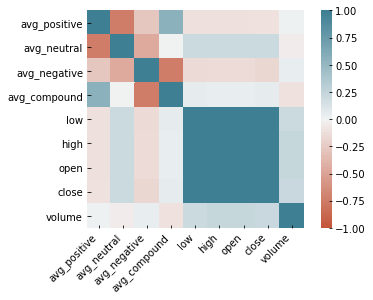

In [92]:
corr = crypto.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Seaborn Factorplot

In [ ]:
import seaborn as sns

melt_df = crypto.melt('time', var_name='cols',  value_name='vals')
g = sns.factorplot(x="time", y="vals", hue='cols', data=melt_df)